In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
np.random.seed(44)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [216]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 4

05/18/2023  04:42 PM    <DIR>          .
05/18/2023  04:42 PM    <DIR>          ..
05/18/2023  01:29 PM    <DIR>          .ipynb_checkpoints
08/30/2022  04:01 PM           561,600 Bank Customer Churn Prediction.csv
05/18/2023  04:42 PM           894,933 Untitled.ipynb
               2 File(s)      1,456,533 bytes
               3 Dir(s)  11,042,967,552 bytes free


In [477]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [478]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our dataset")

There are 10000 Rows and 12 Columns in our dataset


In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [480]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [481]:
# data = pd.concat([class_1,class_0],axis=0).sample(frac=1).reset_index(drop=True)
# data.head()

In [482]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [483]:
print(f"Number of duplicated Values is {data.duplicated().sum()}")

Number of duplicated Values is 0


In [484]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [485]:
def count_plot(col,title):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.show()
def multi_count_plot(col,col2,title=""):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col,hue=col2)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
def barplot_mean(col,title):
    plt.figure(figsize=(10,6))
    sns.barplot(x=data.groupby('churn')[col].mean().index,
                y=data.groupby('churn')[col].mean().values)
    plt.title(title)
    plt.show()
def approved_vs_not(col,Limit=5):
    fig,ax = plt.subplots(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title('Approved')
    positive = data[data['churn']==1]
    plt.pie(positive[col].value_counts()[:Limit],labels=
        positive[col].value_counts()[:Limit].index,
           autopct='%1.1f%%')
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    negative = data[data['churn']==0]
    plt.pie(negative[col].value_counts()[:Limit],labels=
        negative[col].value_counts()[:Limit].index,
        autopct ='%1.2f%%' )
    plt.show()   
            

## Target Column

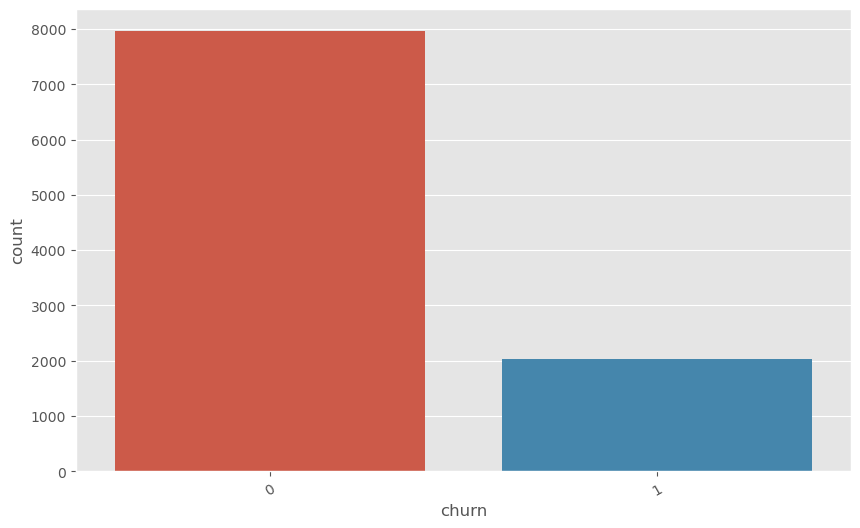

In [486]:
count_plot("churn","")

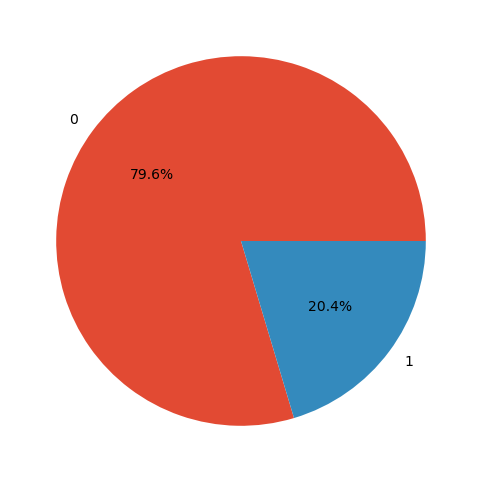

In [487]:
pie_plot('churn')

In [488]:
data.groupby('churn').mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [489]:
data.groupby('churn').median()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


In [490]:
def get_insights(column):
    print(f"### Columns in {column} its type is {data[column].dtype}")
    print("\n### most appeared values ")
    print(data[column].value_counts().index[:5].values)
    print(f"\n### Number of unique values is \n{data[column].nunique()} ")
    print('\n#### Random Values ####')
    print(data.sample(5)[column].values)

In [491]:
get_insights('credit_score')

### Columns in credit_score its type is int64

### most appeared values 
[850 678 655 705 667]

### Number of unique values is 
460 

#### Random Values ####
[650 446 582 583 636]


In [492]:
data['credit_score'].min() , data['credit_score'].max()

(350, 850)

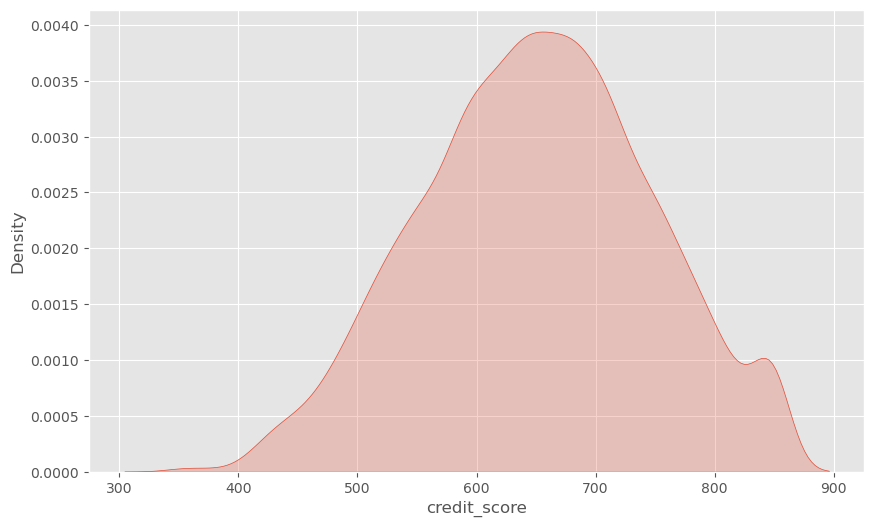

In [493]:
kde_plot('credit_score')

In [494]:
get_insights('country')

### Columns in country its type is object

### most appeared values 
['France' 'Germany' 'Spain']

### Number of unique values is 
3 

#### Random Values ####
['France' 'France' 'Spain' 'France' 'Germany']


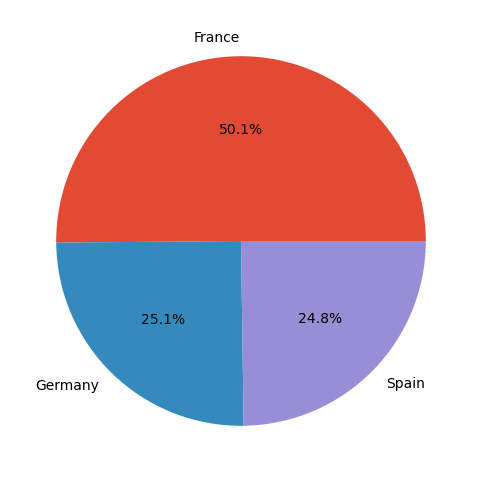

In [495]:
pie_plot('country',"The count of Each country")

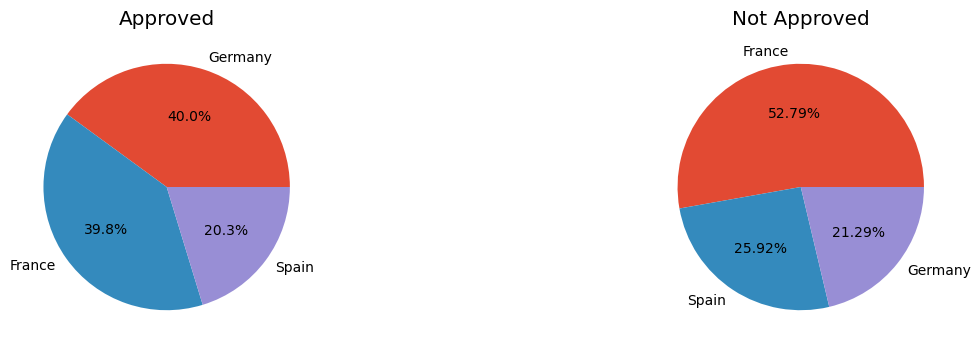

In [496]:
approved_vs_not('country')

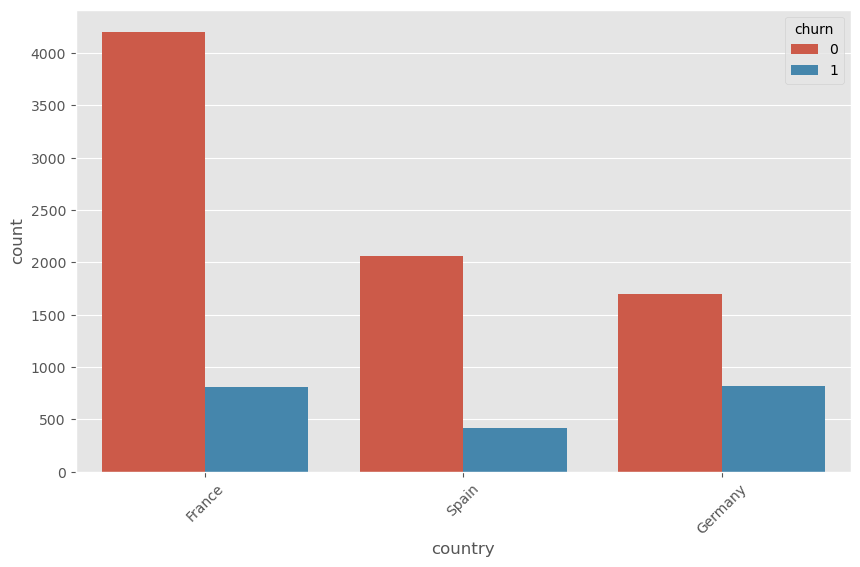

In [497]:
multi_count_plot('country','churn')

### gender

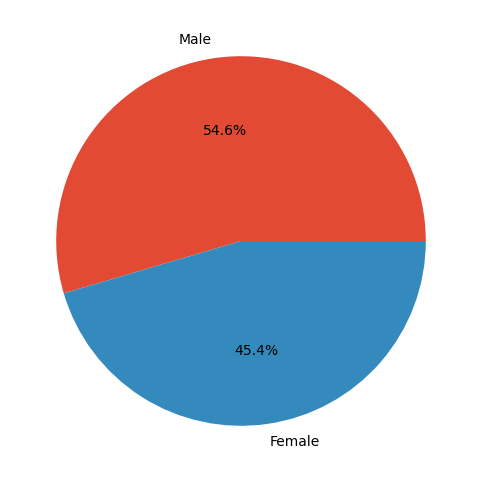

In [498]:
pie_plot('gender')

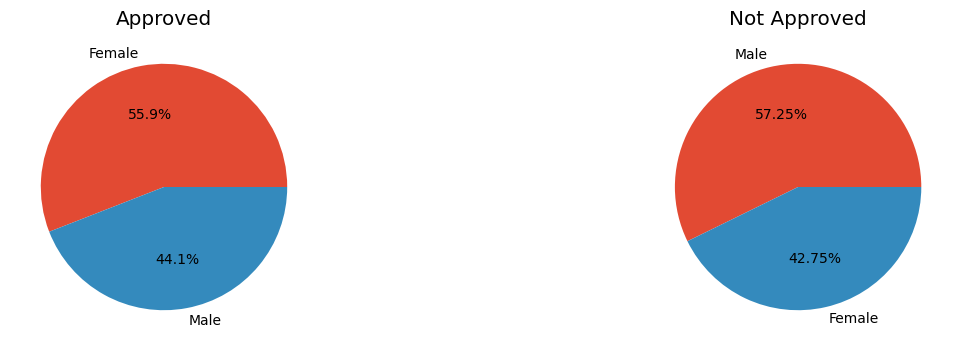

In [499]:
approved_vs_not('gender')

### age

In [500]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

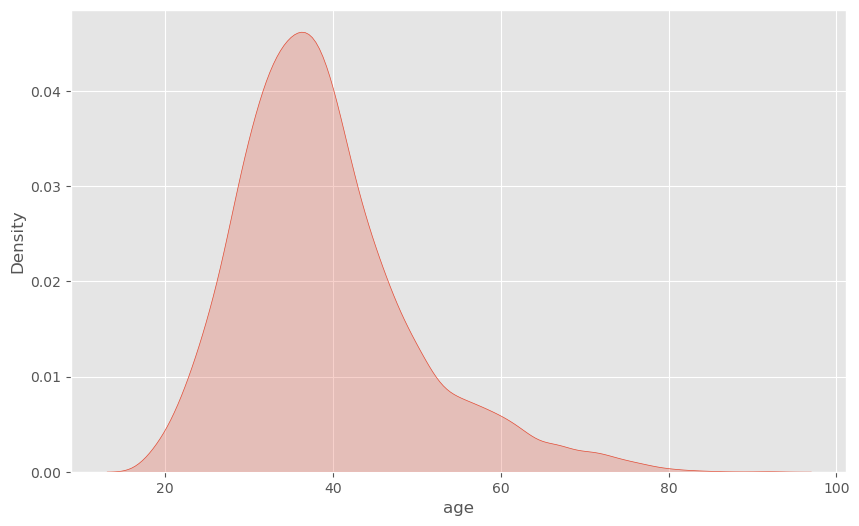

In [501]:
kde_plot('age')

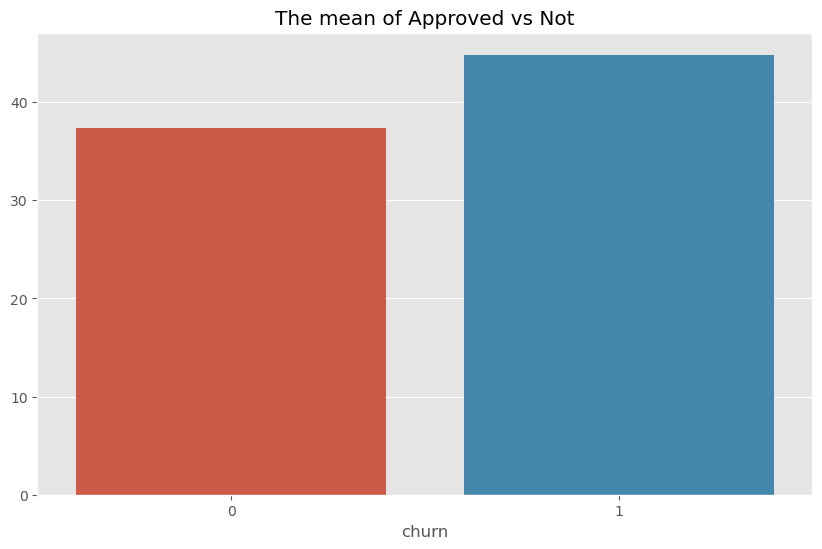

In [502]:
barplot_mean('age',"The mean of Approved vs Not")

### tenure

In [503]:
get_insights('tenure')

### Columns in tenure its type is int64

### most appeared values 
[2 1 7 8 5]

### Number of unique values is 
11 

#### Random Values ####
[9 1 4 1 5]


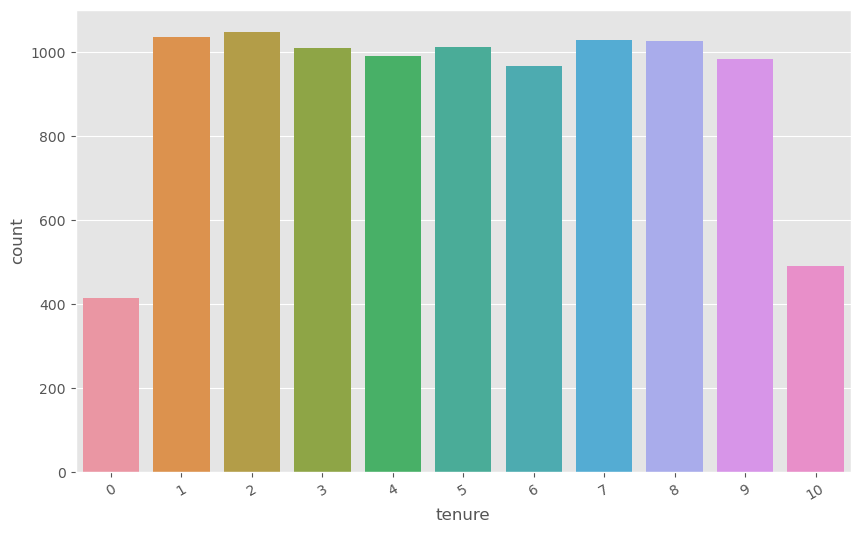

In [504]:
count_plot('tenure',"")

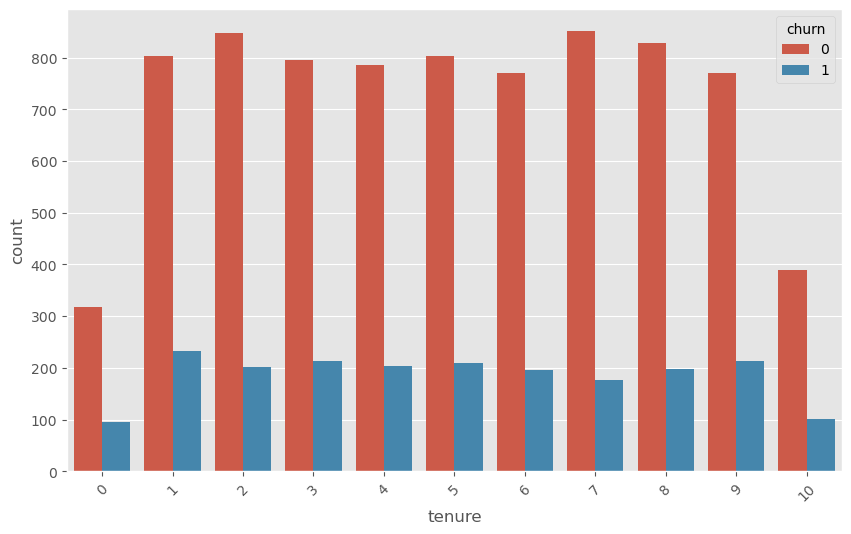

In [505]:
multi_count_plot('tenure','churn')

In [506]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### balance

In [507]:
get_insights('balance')

### Columns in balance its type is float64

### most appeared values 
[     0.   130170.82 105473.74  85304.27 159397.75]

### Number of unique values is 
6382 

#### Random Values ####
[     0.   187013.13 160736.63      0.   142631.54]


In [508]:
data['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

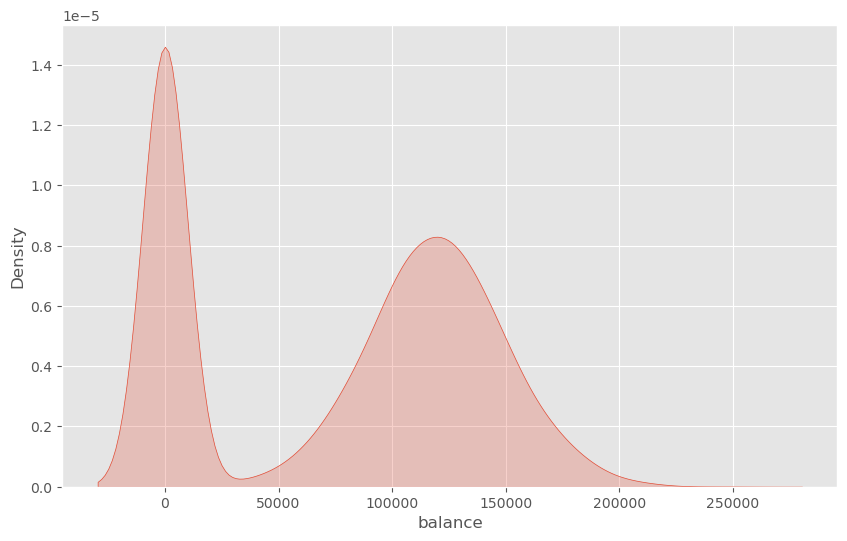

In [509]:
kde_plot('balance')

In [510]:
data[data['balance'] < 1]['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

In [511]:
get_insights('products_number')

### Columns in products_number its type is int64

### most appeared values 
[1 2 3 4]

### Number of unique values is 
4 

#### Random Values ####
[1 1 1 1 2]


In [512]:
data['products_number'] = data['products_number'].astype(str)

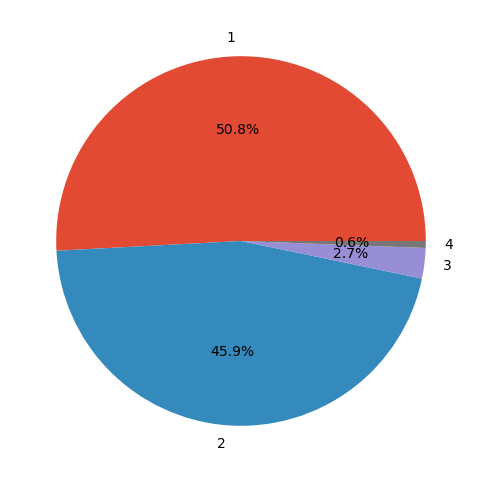

In [513]:
pie_plot('products_number')

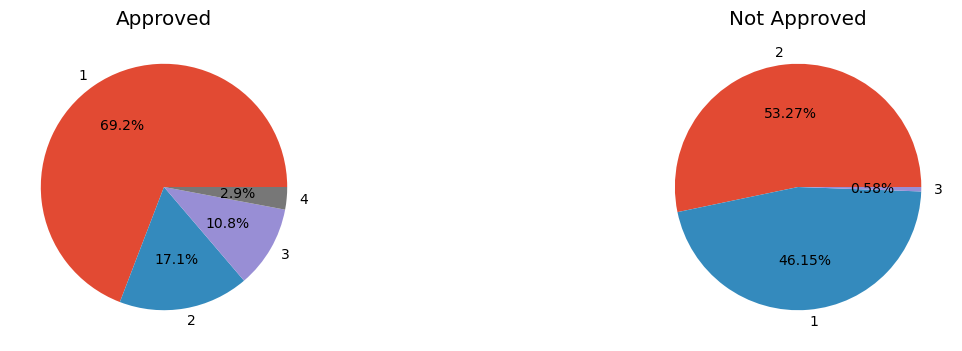

In [514]:
approved_vs_not('products_number')

In [515]:
get_insights('credit_card')

### Columns in credit_card its type is int64

### most appeared values 
[1 0]

### Number of unique values is 
2 

#### Random Values ####
[0 1 1 1 1]


In [516]:
data['credit_card'] = data['credit_card'].astype(str)

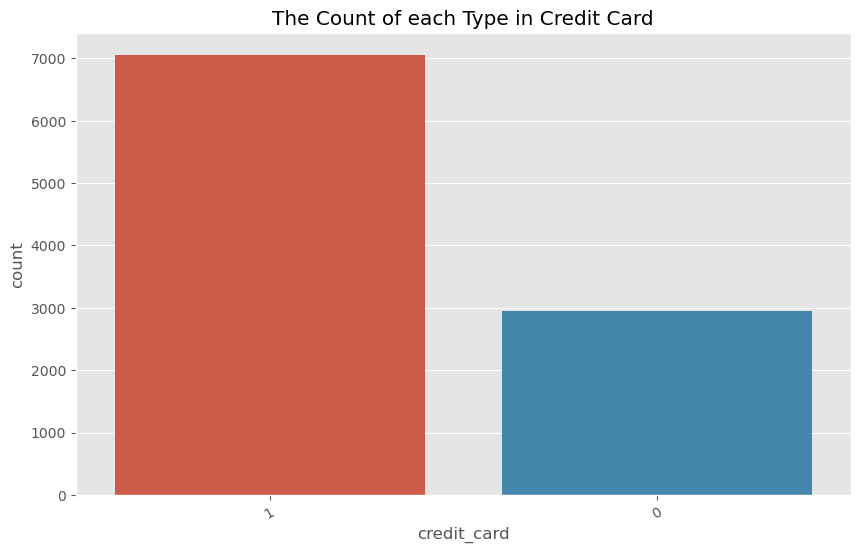

In [517]:
count_plot('credit_card',"The Count of each Type in Credit Card")

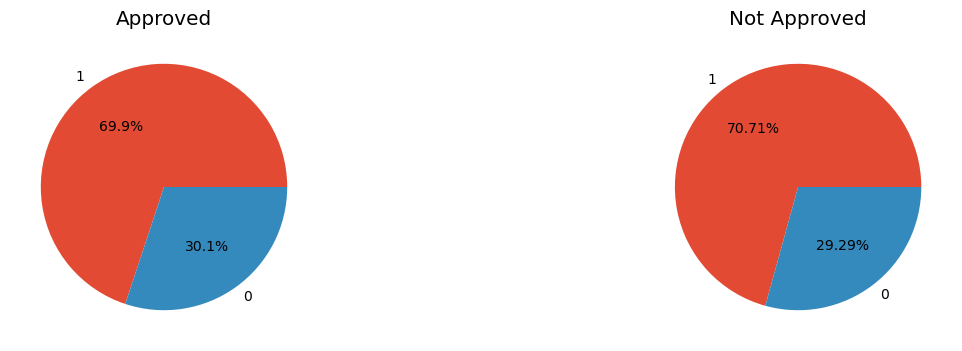

In [518]:
approved_vs_not('credit_card')

In [519]:
get_insights('active_member')

### Columns in active_member its type is int64

### most appeared values 
[1 0]

### Number of unique values is 
2 

#### Random Values ####
[1 1 1 0 1]


In [520]:
data['active_member'] = data['active_member'].astype(str)

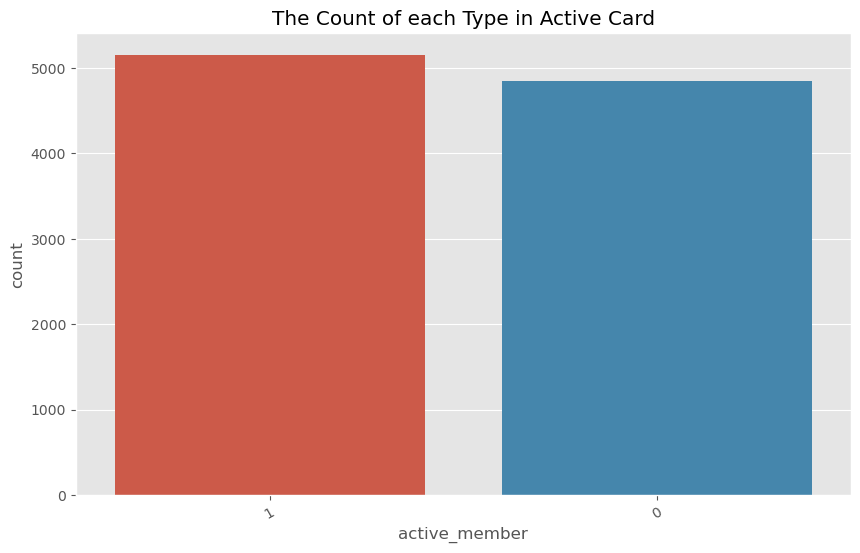

In [521]:
count_plot('active_member',"The Count of each Type in Active Card")

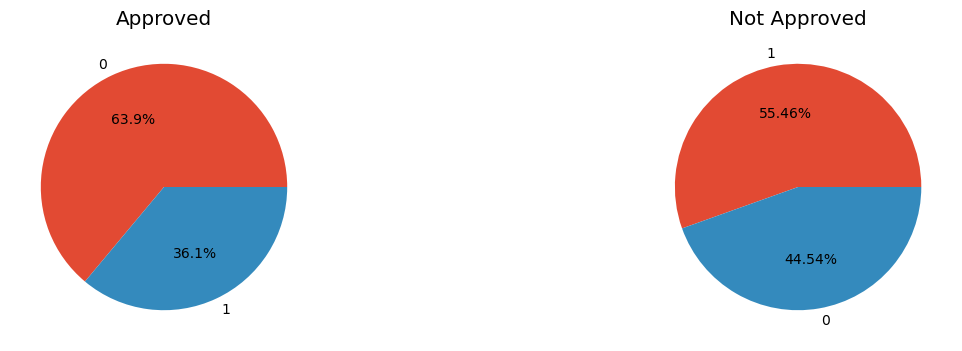

In [522]:
approved_vs_not('active_member')

In [523]:
get_insights('estimated_salary')

### Columns in estimated_salary its type is float64

### most appeared values 
[ 24924.92 101348.88  55313.44  72500.68 182692.8 ]

### Number of unique values is 
9999 

#### Random Values ####
[ 99828.45 185227.42  76192.21  86333.63  71047.51]


In [524]:
data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

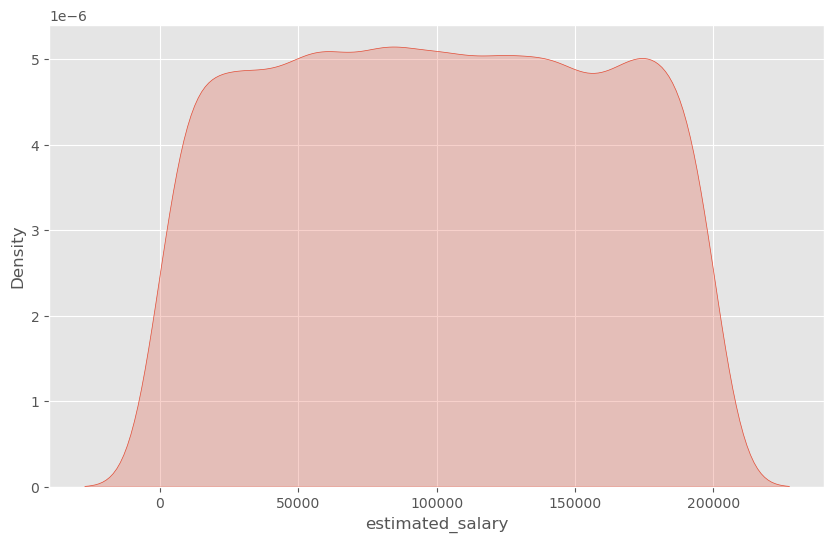

In [525]:
kde_plot('estimated_salary')

In [526]:
print(len(data[data['estimated_salary'] < 1000]))
data[data['estimated_salary'] < 1000]

59


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
149,15794413,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,15594815,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,15684548,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,15584766,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,15571816,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
925,15636731,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,15634141,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
982,15792360,668,France,Male,32,7,0.00,2,1,1,777.37,0
1139,15569247,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1451,15684198,551,France,Female,38,10,0.00,2,1,1,216.27,0


## Explantory Data analysis

In [527]:
def bar_mean(data_mean,col,title):
    plt.figure(figsize=(10,6))
    plt.bar(x=data_mean[col].index, height = data_mean[col].values)
    plt.title(title)
    plt.show()

In [528]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [529]:
country_mean = data.groupby('country').mean()
country_mean

,customer_id,credit_score,age,tenure,balance,estimated_salary,churn
country,,,,,,,
France,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,99899.180814,0.161548
Germany,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,101113.435102,0.324432
Spain,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,99440.572281,0.166734


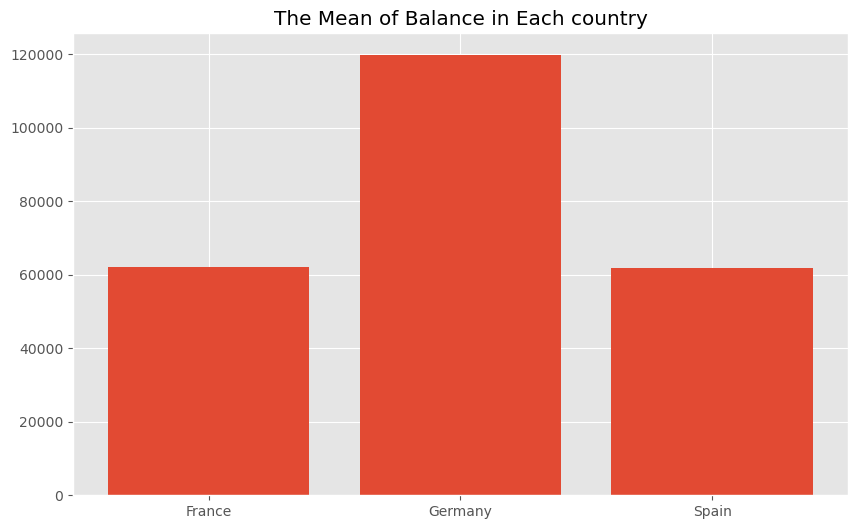

In [530]:
bar_mean(country_mean,'balance','The Mean of Balance in Each country')

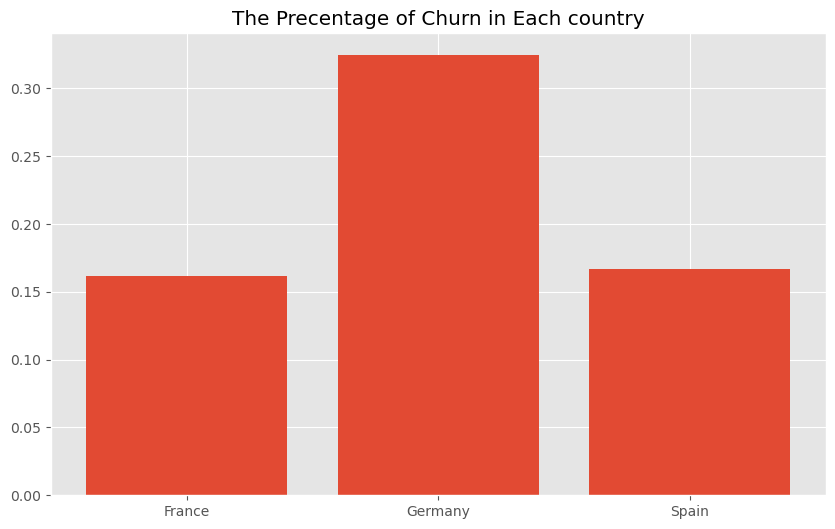

In [531]:
bar_mean(country_mean,'churn','The Precentage of Churn in Each country')

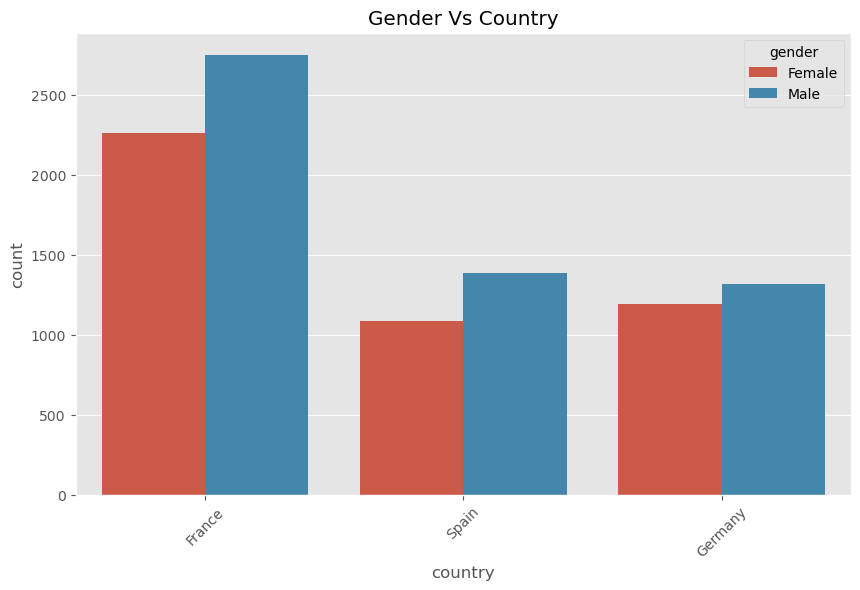

In [532]:
multi_count_plot('country','gender',"Gender Vs Country")

In [533]:
gender_mean = data.groupby('gender').mean()
gender_mean

,customer_id,credit_score,age,tenure,balance,estimated_salary,churn
gender,,,,,,,
Female,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,100601.541382,0.250715
Male,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,99664.576931,0.164559


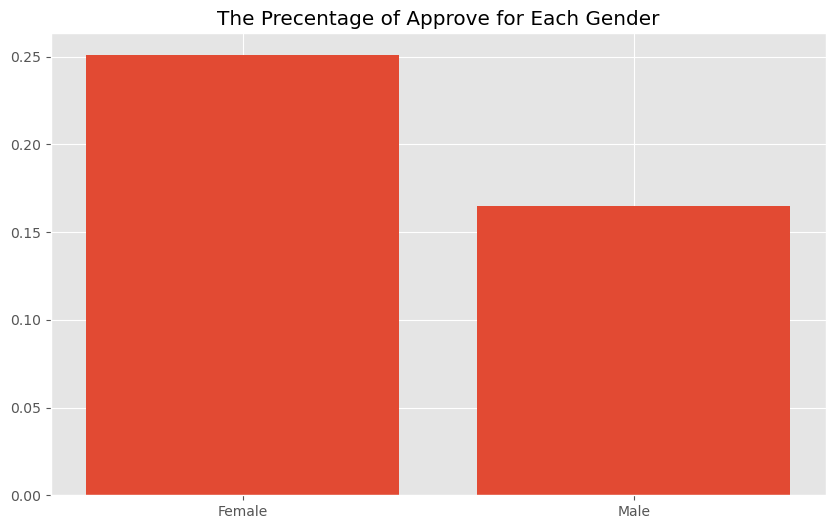

In [534]:
bar_mean(gender_mean,'churn','The Precentage of Approve for Each Gender')

In [535]:
tenure_mean = data.groupby('tenure').mean()
tenure_mean

,customer_id,credit_score,age,balance,estimated_salary,churn
tenure,,,,,,
0,1.569345e+07,652.043584,39.186441,79878.910630,102374.579128,0.230024
1,1.569172e+07,648.806763,39.428986,78555.384222,100468.618957,0.224155
2,1.569515e+07,652.832061,39.058206,76839.626469,98312.359857,0.191794
3,1.569411e+07,650.530228,39.028741,77668.059881,97667.196283,0.211100
4,1.568988e+07,651.502528,38.239636,74059.394065,99867.777826,0.205258
5,1.568470e+07,650.527668,39.287549,76444.280860,101286.009644,0.206522
6,1.569046e+07,647.380558,38.862461,74403.942637,99168.733154,0.202689
7,1.569119e+07,649.606031,38.367704,75551.634426,101257.240370,0.172179
8,1.568839e+07,647.749268,38.450732,77936.598254,101072.102937,0.192195


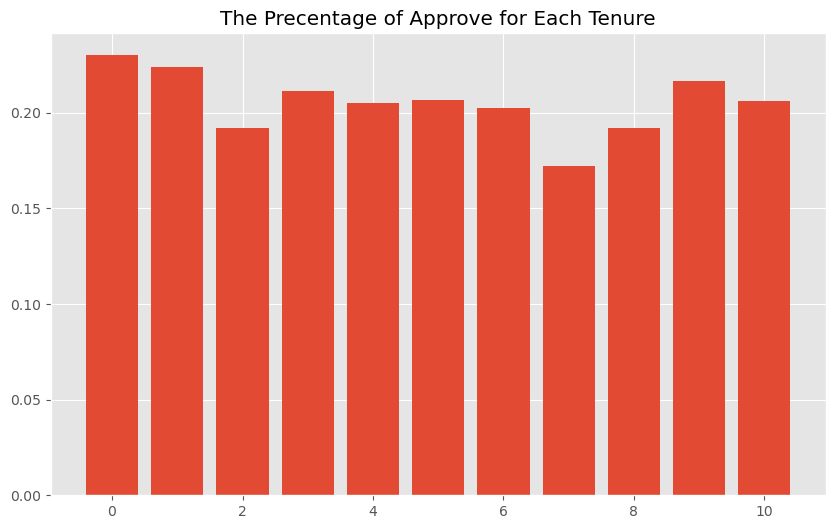

In [536]:
bar_mean(tenure_mean,'churn','The Precentage of Approve for Each Tenure')

In [537]:
active_memberMean = data.groupby('active_member').mean()
active_memberMean

,customer_id,credit_score,age,tenure,balance,estimated_salary,churn
active_member,,,,,,,
0,1.569082e+07,647.973603,37.997938,5.097340,77134.376863,100767.203854,0.268509
1,1.569106e+07,652.934188,39.791497,4.933217,75875.422145,99452.965894,0.142691


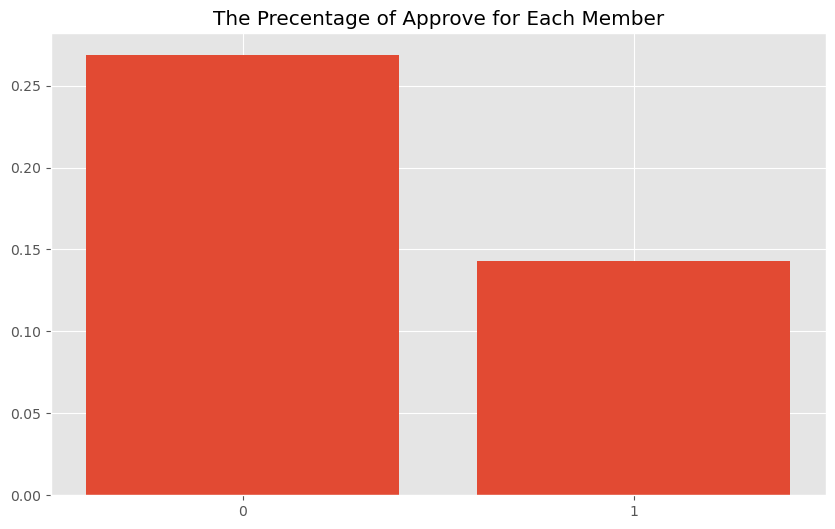

In [538]:
bar_mean(active_memberMean,'churn','The Precentage of Approve for Each Member')

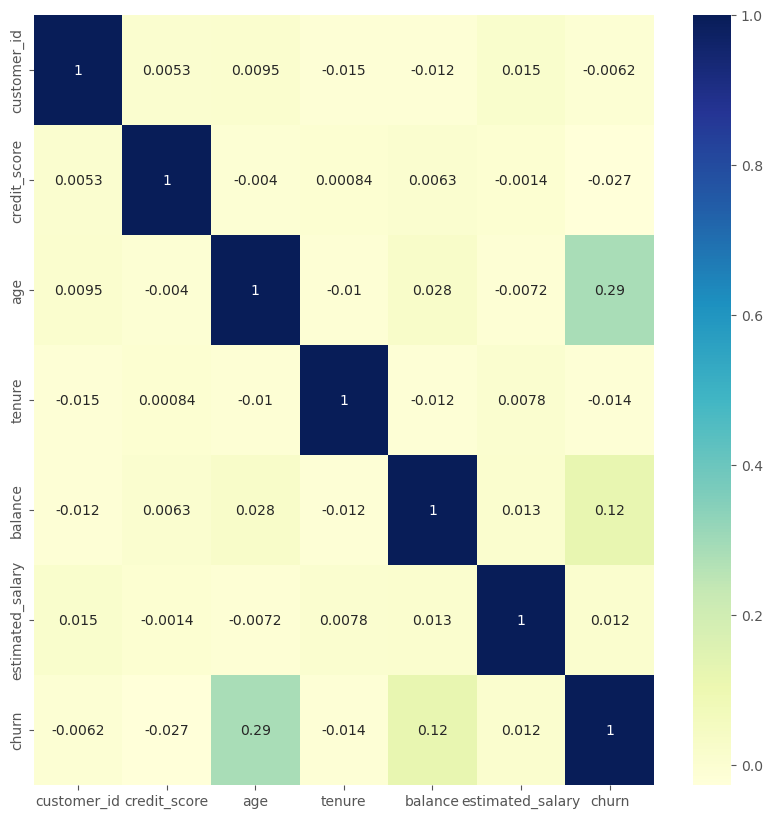

In [539]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

## Preprocessing

In [540]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [541]:
X = data.drop(['churn','credit_score'],axis=1)
Y = data['churn'].values

In [542]:
numerical = [col for col in X.columns if data[col].dtype != "O"]
numerical

['customer_id', 'age', 'tenure', 'balance', 'estimated_salary']

In [543]:
categorical = [col for col in X.columns if data[col].dtype == "O"]
categorical

['country', 'gender', 'products_number', 'credit_card', 'active_member']

In [544]:
for col in categorical:
    print(col + " has : " + str(X[col].nunique()))

country has : 3
gender has : 2
products_number has : 4
credit_card has : 2
active_member has : 2


In [545]:
transform_pipeline = ColumnTransformer([
    ('num',StandardScaler(),numerical),
    ('category',OneHotEncoder(),categorical)
])

In [587]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size= .2,random_state=42,stratify=Y)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [588]:
x_train = transform_pipeline.fit_transform(x_train)
x_test = transform_pipeline.transform(x_test)

In [589]:
from imblearn.over_sampling import RandomOverSampler

In [590]:
oversample = RandomOverSampler(sampling_strategy=0.5)

In [591]:
x_train,y_train = oversample.fit_resample(x_train,y_train)
x_train.shape,y_train.shape

((9555, 18), (9555,))

In [592]:
naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [593]:
naive.score(x_test,y_test)

0.822

In [594]:
y_pred = naive.predict(x_test)

In [595]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1593
           1       0.87      0.15      0.25       407

    accuracy                           0.82      2000
   macro avg       0.84      0.57      0.58      2000
weighted avg       0.83      0.82      0.77      2000



In [596]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [597]:
lg.score(x_test,y_test)

0.833

In [598]:
y_pred = lg.predict(x_test)

In [599]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1593
           1       0.59      0.56      0.58       407

    accuracy                           0.83      2000
   macro avg       0.74      0.73      0.74      2000
weighted avg       0.83      0.83      0.83      2000



In [600]:
from sklearn.ensemble import GradientBoostingClassifier

In [601]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [602]:
gbc.score(x_test,y_test)

0.8505

In [603]:
y_pred = gbc.predict(x_test)

In [584]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.76      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000

